In [1]:
import pandas as pd

In [2]:
daf= pd.read_excel('E:/Eduvance/machine-learning-course/4th_july.xlsx','2518')
daf.shape

(27, 6)

In [3]:
daf = daf.dropna(subset=['KMPL','RED','GREEN','YELLOW','IDLE'])
daf.head()

,OBU_ID,KMPL,RED,GREEN,YELLOW,IDLE
0,1269,4.207964,1.604938,27.283951,53.580247,17.407407
1,1270,5.970983,0.436681,6.113537,20.087336,72.925764
2,1274,3.942188,0.431034,13.146552,44.612069,41.810345
3,1275,4.547486,0.000000,20.871985,63.079777,15.862709
4,1276,4.711992,0.349895,22.603219,53.463961,23.372988


In [4]:
daf.drop(daf[['OBU_ID','IDLE']],axis=1,inplace=True)
daf.shape

(26, 4)

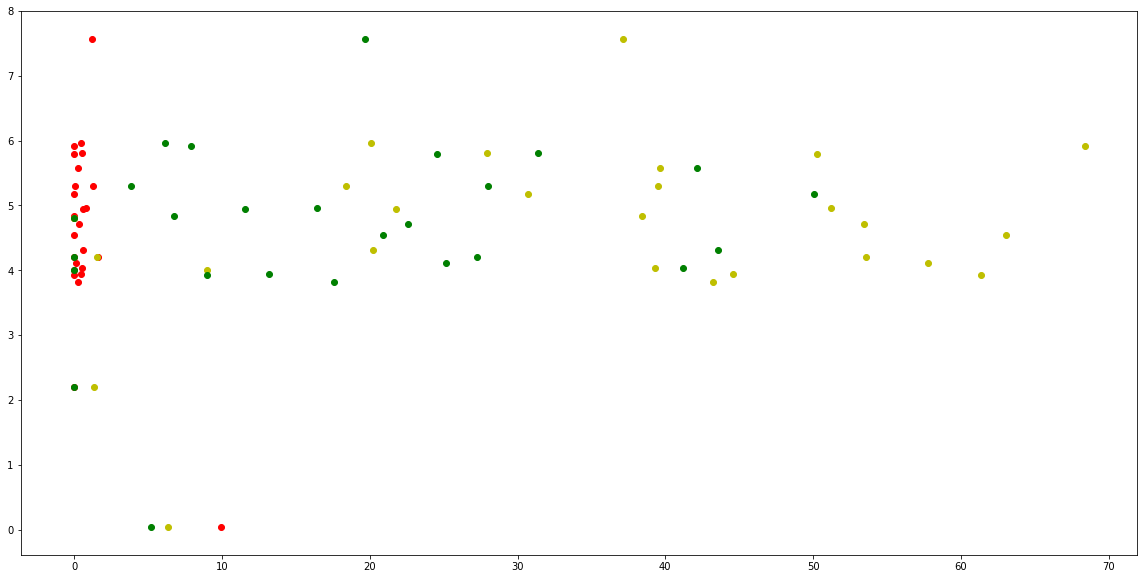

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(daf['RED'],daf['KMPL'],c='r')
plt.scatter(daf['YELLOW'],daf['KMPL'],c='y')
plt.scatter(daf['GREEN'],daf['KMPL'],c='g')

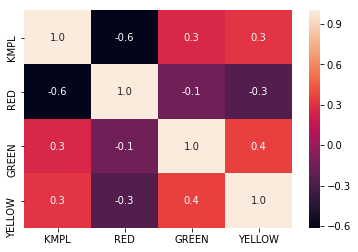

In [6]:
import seaborn as sb
sb.heatmap(daf.corr(),annot=True,fmt='.1f')

In [46]:
import numpy as np
x =daf[['RED','GREEN','YELLOW']]
y = daf['KMPL']

In [47]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# Create and fit the model
#model = SGDRegressor(loss="squared_loss", max_iter=100000)
poly = PolynomialFeatures(degree=3)

Quadratic_train = poly.fit_transform(x)
model = LinearRegression() 
model.fit(Quadratic_train,y)
print(model.predict(Quadratic_train))
daf

[4.31999745 5.05380208 4.73781358 4.38314597 3.98600813 4.02671501
 5.22157098 4.43730208 5.79762816 4.30471161 3.76199113 5.53281457
 5.38039568 4.20069507 5.5798394  4.6644756  7.30626512 3.59896118
 4.71442084 5.45532261 4.18735363 3.74483201 5.1670369  0.0396938
 4.80041275 5.62262985]


,KMPL,RED,GREEN,YELLOW
0,4.207964,1.604938,27.283951,53.580247
1,5.970983,0.436681,6.113537,20.087336
2,3.942188,0.431034,13.146552,44.612069
3,4.547486,0.000000,20.871985,63.079777
4,4.711992,0.349895,22.603219,53.463961
5,4.029915,0.555170,41.221374,39.278279
7,5.788846,0.000000,24.581006,50.279330
8,4.000000,0.000000,0.000000,8.965517
9,5.813847,0.531915,31.382979,27.925532
10,4.318940,0.613497,43.558282,20.245399


In [48]:
predicted = model.predict(Quadratic_train)
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted, y)

0.34111839999641125

In [49]:
model.score(Quadratic_train,y)

0.8126261823156182

In [35]:
daf_test= pd.read_excel('E:/Eduvance/machine-learning-course/alldays_2518.xlsx','2518')
daf_test.head()

,OBU_ID,KMPL,RED,GREEN,YELLOW,IDLE
0,1269,4.700751,1.217268,37.933475,37.848549,22.901628
1,1270,5.528762,0.255493,9.504343,20.030659,70.158406
2,1274,4.374219,0.423240,10.965756,43.901501,44.671027
3,1275,4.543044,0.191489,24.680851,56.659574,18.170213
4,1276,4.522966,0.252574,13.269866,54.944628,31.319215


In [36]:
daf_test = daf_test.dropna(subset=['KMPL','RED','GREEN','YELLOW','IDLE'])
daf_test.head()

,OBU_ID,KMPL,RED,GREEN,YELLOW,IDLE
0,1269,4.700751,1.217268,37.933475,37.848549,22.901628
1,1270,5.528762,0.255493,9.504343,20.030659,70.158406
2,1274,4.374219,0.423240,10.965756,43.901501,44.671027
3,1275,4.543044,0.191489,24.680851,56.659574,18.170213
4,1276,4.522966,0.252574,13.269866,54.944628,31.319215


In [37]:
daf_test.drop(daf_test[['OBU_ID','IDLE']],axis=1,inplace=True)
daf_test.shape

(27, 4)

In [43]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

poly = PolynomialFeatures(degree=3)
X = daf_test[['RED','GREEN','YELLOW']]
Y=daf_test[['KMPL']]
Quadratic_test = poly.fit_transform(X)

model = LinearRegression() 
model.fit(Quadratic_test,Y)


print(model.predict(Quadratic_test))

print(len(Quadratic_test),len(Y))
daf_test

[[4.62362129]
 [5.53652371]
 [4.57137805]
 [4.92547594]
 [4.81860119]
 [4.36680446]
 [5.02468616]
 [4.63583034]
 [5.14646264]
 [4.91848834]
 [4.48536401]
 [4.5703121 ]
 [5.4523337 ]
 [4.52202309]
 [4.51257027]
 [4.60525419]
 [4.73881936]
 [5.10447844]
 [4.75180746]
 [4.68217356]
 [5.1110444 ]
 [4.73772733]
 [4.74395417]
 [5.35470481]
 [3.59484688]
 [4.62347581]
 [5.50863145]]
27 27


,KMPL,RED,GREEN,YELLOW
0,4.700751,1.217268,37.933475,37.848549
1,5.528762,0.255493,9.504343,20.030659
2,4.374219,0.423240,10.965756,43.901501
3,4.543044,0.191489,24.680851,56.659574
4,4.522966,0.252574,13.269866,54.944628
5,4.067850,0.793937,29.592205,44.803320
6,5.193900,0.446082,33.494957,25.814585
7,4.794337,0.407332,16.904277,56.754922
8,5.159446,0.430606,7.187811,51.970851
9,4.749710,0.487277,21.765024,36.870601


In [44]:
predicted = model.predict(Quadratic_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted, Y)

0.05102093980329583

In [45]:
model.score(Quadratic_test,Y)

0.7584676524567106

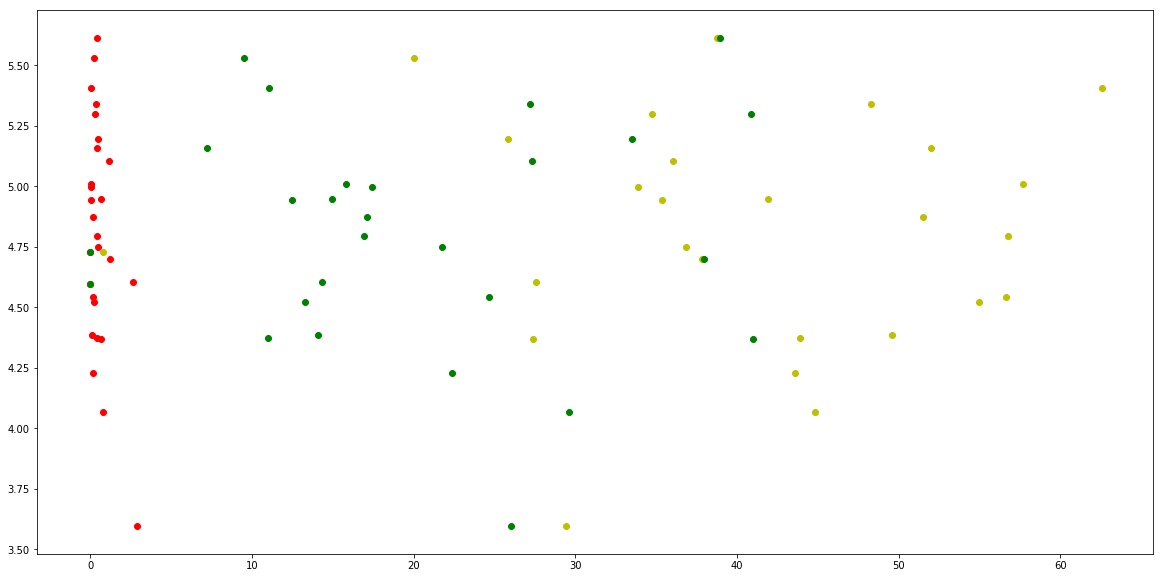

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(daf_test['RED'],daf_test['KMPL'],c='r')
plt.scatter(daf_test['YELLOW'],daf_test['KMPL'],c='y')
plt.scatter(daf_test['GREEN'],daf_test['KMPL'],c='g')

In [50]:
model.predict(Quadratic_test)

array([ 7.55054908,  4.20491684,  5.01477952,  4.40390341,  4.56964047,
        4.30489696,  5.37020003,  4.28674158,  6.51401128,  4.83989514,
        5.37542971,  3.684239  ,  4.51608628,  4.08477262,  4.02704969,
       17.03930137,  4.03346541,  7.96892594,  3.59896118,  4.99946882,
        3.8800799 ,  3.76531103,  4.46328954,  5.21238452, 40.35435917,
        4.49896898,  4.85181685])

In [53]:
daf_test['KMPL']

0     4.700751
1     5.528762
2     4.374219
3     4.543044
4     4.522966
5     4.067850
6     5.193900
7     4.794337
8     5.159446
9     4.749710
10    4.367890
11    4.727273
12    5.407367
13    4.874227
14    4.383407
15    4.602639
16    5.008780
17    5.105145
18    4.596623
19    4.944791
20    4.996830
21    4.943723
22    5.339192
23    5.298824
24    3.595255
25    4.227969
26    5.612475
Name: KMPL, dtype: float64